In [1560]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

input_path = "/kaggle/input"
if not os.path.exists("/kaggle/input"):
    input_path = "./kaggle/input"
    
for dirname, _, filenames in os.walk(input_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

./kaggle/input/crop-recommendation-dataset/Crop_recommendation.csv


In [1561]:
df = pd.read_csv(f"{input_path}/crop-recommendation-dataset/Crop_recommendation.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [1562]:
df.describe([.01,.1,.2,.3,.4,.5,.6,.7,.8,.9,.99])

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
1%,0.000000,5.990000,7.990000,11.827382,15.225297,4.603202,21.903847
10%,8.000000,16.000000,16.000000,19.250363,36.663404,5.626977,43.944456
20%,17.000000,24.000000,19.000000,21.793720,54.299873,5.858209,57.195647
30%,24.000000,35.000000,22.000000,23.416304,63.185711,6.081450,68.831690
40%,31.000000,42.000000,25.000000,24.630712,70.887043,6.251520,79.268640
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624


In [1563]:
X = df.loc[:, df.columns != "label"].astype(float)
y = df.loc[:, df.columns == "label"].astype(str)
X.shape, y.shape

((2200, 7), (2200, 1))

In [1564]:
corr = X.corr()
corr.style.background_gradient(cmap="coolwarm", axis=None).format(precision=2)

,N,P,K,temperature,humidity,ph,rainfall
N,1.00,-0.23,-0.14,0.03,0.19,0.10,0.06
P,-0.23,1.00,0.74,-0.13,-0.12,-0.14,-0.06
K,-0.14,0.74,1.00,-0.16,0.19,-0.17,-0.05
temperature,0.03,-0.13,-0.16,1.00,0.21,-0.02,-0.03
humidity,0.19,-0.12,0.19,0.21,1.00,-0.01,0.09
ph,0.10,-0.14,-0.17,-0.02,-0.01,1.00,-0.11
rainfall,0.06,-0.06,-0.05,-0.03,0.09,-0.11,1.00


### Engineered Features

In this notebook, we have created several new features based on the existing variables. These features are designed to capture additional information and potentially improve the performance of our models. Let's take a look at each feature and its purpose:

1. **n_ratio**: This feature represents the ratio of nitrogen (N) content to the total nutrient content (N + P + K) in the soil. It provides insights into the relative abundance of nitrogen compared to other nutrients.

2. **p_ratio**: The p_ratio feature represents the ratio of phosphorus (P) content to the total nutrient content (N + P + K) in the soil. It indicates the proportion of phosphorus in relation to other nutrients.

3. **k_ratio**: This feature denotes the ratio of potassium (K) content to the total nutrient content (N + P + K) in the soil. It helps us understand the relative abundance of potassium compared to other nutrients.

4. **n_k_ratio**: The n_k_ratio feature represents the ratio of nitrogen (N) content to potassium (K) content in the soil. It provides insights into the balance between nitrogen and potassium, which is essential for plant growth and development.

5. **p_k_ratio**: This feature denotes the ratio of phosphorus (P) content to potassium (K) content in the soil. It helps us understand the balance between phosphorus and potassium, which is important for various plant processes.

6. **ph_acidic**: The ph_acidic feature is a binary indicator that represents whether the pH of the soil is acidic. It is determined based on a threshold of pH below 6.

7. **ph_neutral**: The ph_neutral feature is a binary indicator that represents whether the pH of the soil is within the neutral range. It is determined based on a threshold of pH between 6 and 8, inclusive.

8. **ph_alkaline**: The ph_alkaline feature is a binary indicator that represents whether the pH of the soil is alkaline. It is determined based on a threshold of pH above 8.

These engineered features provide additional insights into the nutrient composition and acidity/alkalinity of the soil, which can be valuable for understanding crop-specific factors and making informed decisions related to farming. By incorporating these features into our models, we aim to improve their predictive capabilities and potentially achieve better performance.

In [1566]:
X["n_ratio"] = X["N"] / (X["N"] + X["P"] + X["K"])
X["p_ratio"] = X["P"] / (X["N"] + X["P"] + X["K"])
X["k_ratio"] = X["K"] / (X["N"] + X["P"] + X["K"])
X["n_k_ratio"] = X["N"] / X["K"]
X["p_k_ratio"] = X["P"] / X["K"]
X["ph_acidic"] = X["ph"] < 6
X["ph_neutral"] = (X["ph"] >= 6) & (X["ph"] <= 8)
X["ph_alkaline"] = X["ph"] > 8
# X["temperature_low"] = X["temperature"] < 25
# X["temperature_high"] = X["temperature"] >= 25
# X["rainfall_low"] = X["rainfall"] < 95
# X["rainfall_high"] = (X["rainfall"] >= 95) & (X["rainfall"] < 147)
# X["rainfall_very_high"] = X["rainfall"] >= 147
X = X.astype(float)

corr = X.corr()
corr.style.background_gradient(cmap="coolwarm", axis=None).format(precision=2)

,N,P,K,temperature,humidity,ph,rainfall,n_ratio,p_ratio,k_ratio,n_k_ratio,p_k_ratio,ph_acidic,ph_neutral,ph_alkaline
N,1.00,-0.23,-0.14,0.03,0.19,0.10,0.06,0.88,-0.64,-0.44,0.74,-0.20,-0.24,0.26,-0.09
P,-0.23,1.00,0.74,-0.13,-0.12,-0.14,-0.06,-0.55,0.44,0.23,-0.28,0.20,0.24,-0.23,0.00
K,-0.14,0.74,1.00,-0.16,0.19,-0.17,-0.05,-0.40,-0.13,0.70,-0.39,-0.45,0.15,-0.14,-0.02
temperature,0.03,-0.13,-0.16,1.00,0.21,-0.02,-0.03,0.06,0.01,-0.09,-0.03,0.01,-0.08,0.08,-0.02
humidity,0.19,-0.12,0.19,0.21,1.00,-0.01,0.09,0.22,-0.44,0.22,0.08,-0.39,-0.21,0.28,-0.22
ph,0.10,-0.14,-0.17,-0.02,-0.01,1.00,-0.11,0.15,-0.02,-0.17,0.17,0.07,-0.68,0.50,0.46
rainfall,0.06,-0.06,-0.05,-0.03,0.09,-0.11,1.00,0.09,-0.13,0.03,0.00,-0.16,0.12,-0.07,-0.12
n_ratio,0.88,-0.55,-0.40,0.06,0.22,0.15,0.09,1.00,-0.70,-0.53,0.80,-0.18,-0.28,0.30,-0.09
p_ratio,-0.64,0.44,-0.13,0.01,-0.44,-0.02,-0.13,-0.70,1.00,-0.23,-0.35,0.78,0.21,-0.24,0.10
k_ratio,-0.44,0.23,0.70,-0.09,0.22,-0.17,0.03,-0.53,-0.23,1.00,-0.67,-0.68,0.14,-0.13,0.00


In [1567]:
print("Features:")
X.head()

Features:


,N,P,K,temperature,humidity,ph,rainfall,n_ratio,p_ratio,k_ratio,n_k_ratio,p_k_ratio,ph_acidic,ph_neutral,ph_alkaline
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536,0.514286,0.240000,0.245714,2.093023,0.976744,0.0,1.0,0.0
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537,0.461957,0.315217,0.222826,2.073171,1.414634,0.0,1.0,0.0
2,60.0,55.0,44.0,23.004459,82.320763,7.840207,263.964248,0.377358,0.345912,0.276730,1.363636,1.250000,0.0,1.0,0.0
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,242.864034,0.496644,0.234899,0.268456,1.850000,0.875000,0.0,1.0,0.0
4,78.0,42.0,42.0,20.130175,81.604873,7.628473,262.717340,0.481481,0.259259,0.259259,1.857143,1.000000,0.0,1.0,0.0


In [1568]:
print("Labels:")
y = pd.get_dummies(y)
y.head()

Labels:


,label_apple,label_banana,label_blackgram,label_chickpea,label_coconut,label_coffee,label_cotton,label_grapes,label_jute,label_kidneybeans,...,label_mango,label_mothbeans,label_mungbean,label_muskmelon,label_orange,label_papaya,label_pigeonpeas,label_pomegranate,label_rice,label_watermelon
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [1569]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)
X_test.head()

,N,P,K,temperature,humidity,ph,rainfall,n_ratio,p_ratio,k_ratio,n_k_ratio,p_k_ratio,ph_acidic,ph_neutral,ph_alkaline
600,19.0,55.0,20.0,27.433294,87.805077,7.185301,54.733676,0.202128,0.585106,0.212766,0.950000,2.750000,0.0,1.0,0.0
1425,117.0,25.0,53.0,29.118585,92.125430,6.413927,24.520202,0.600000,0.128205,0.271795,2.207547,0.471698,0.0,1.0,0.0
1340,100.0,18.0,52.0,26.202345,80.382665,6.876067,56.479418,0.588235,0.105882,0.305882,1.923077,0.346154,0.0,1.0,0.0
149,63.0,43.0,17.0,19.288899,65.470508,6.807488,71.319531,0.512195,0.349593,0.138211,3.705882,2.529412,0.0,1.0,0.0
1519,7.0,144.0,195.0,22.963885,93.580660,5.856481,104.647299,0.020231,0.416185,0.563584,0.035897,0.738462,1.0,0.0,0.0


In [1570]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler

column_transformer = make_column_transformer(
    (MinMaxScaler(), ["N", "P", "K", "temperature", "humidity", "ph", "rainfall"]), 
    remainder="passthrough")
column_transformer.fit(X_train)
column_transformer.get_feature_names_out()

array(['minmaxscaler__N', 'minmaxscaler__P', 'minmaxscaler__K',
       'minmaxscaler__temperature', 'minmaxscaler__humidity',
       'minmaxscaler__ph', 'minmaxscaler__rainfall', 'remainder__n_ratio',
       'remainder__p_ratio', 'remainder__k_ratio', 'remainder__n_k_ratio',
       'remainder__p_k_ratio', 'remainder__ph_acidic',
       'remainder__ph_neutral', 'remainder__ph_alkaline'], dtype=object)

In [1571]:
X_train = pd.DataFrame(column_transformer.transform(X_train), columns=column_transformer.get_feature_names_out())
X_test = pd.DataFrame(column_transformer.transform(X_test), columns=column_transformer.get_feature_names_out())

In [1572]:
print("Features scaled:")
X_train.head()

Features scaled:


,minmaxscaler__N,minmaxscaler__P,minmaxscaler__K,minmaxscaler__temperature,minmaxscaler__humidity,minmaxscaler__ph,minmaxscaler__rainfall,remainder__n_ratio,remainder__p_ratio,remainder__k_ratio,remainder__n_k_ratio,remainder__p_k_ratio,remainder__ph_acidic,remainder__ph_neutral,remainder__ph_alkaline
0,0.235714,0.514286,0.050,0.432475,0.607334,0.668310,0.073276,0.264000,0.616000,0.120000,2.200000,5.133333,0.0,1.0,0.0
1,0.650000,0.057143,0.210,0.582041,0.911964,0.410454,0.027304,0.602649,0.086093,0.311258,1.936170,0.276596,0.0,1.0,0.0
2,0.221429,0.942857,0.955,0.382182,0.928186,0.450298,0.360428,0.085165,0.376374,0.538462,0.158163,0.698980,0.0,1.0,0.0
3,0.707143,0.242857,0.065,0.297724,0.630487,0.405577,0.242598,0.634615,0.250000,0.115385,5.500000,2.166667,0.0,1.0,0.0
4,0.000000,0.914286,0.975,0.426034,0.889315,0.342698,0.301473,0.000000,0.399399,0.600601,0.000000,0.665000,1.0,0.0,0.0


In [1573]:
import tensorflow as tf

print(tf.__version__)

for device in tf.config.list_physical_devices():
    print(device)

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

tf.__version__

2.12.0
PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
Num GPUs Available:  1


'2.12.0'

In [1574]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1536, activation="leaky_relu"),
    tf.keras.layers.Dense(4096, activation="leaky_relu"),
    tf.keras.layers.Dense(y.shape[1], activation="softmax"),
])

In [1575]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [1576]:
callback = tf.keras.callbacks.EarlyStopping(monitor="loss", patience=20)

model.fit(X_train, y_train, epochs=500, validation_split=0.15, callbacks=[callback])

Epoch 1/500
50/50 [==============================] - 3s 57ms/step - loss: 1.3413 - accuracy: 0.5513 - val_loss: 0.6426 - val_accuracy: 0.7367
Epoch 2/500
50/50 [==============================] - 2s 32ms/step - loss: 0.4426 - accuracy: 0.8326 - val_loss: 0.2718 - val_accuracy: 0.9217
Epoch 3/500
50/50 [==============================] - 2s 32ms/step - loss: 0.2370 - accuracy: 0.9245 - val_loss: 0.2127 - val_accuracy: 0.9253
Epoch 4/500
50/50 [==============================] - 2s 31ms/step - loss: 0.2112 - accuracy: 0.9239 - val_loss: 0.3282 - val_accuracy: 0.8861
Epoch 5/500
50/50 [==============================] - 1s 28ms/step - loss: 0.2474 - accuracy: 0.9119 - val_loss: 0.2854 - val_accuracy: 0.8683
Epoch 6/500
50/50 [==============================] - 1s 29ms/step - loss: 0.1724 - accuracy: 0.9358 - val_loss: 0.0853 - val_accuracy: 0.9786
Epoch 7/500
50/50 [==============================] - 1s 27ms/step - loss: 0.1071 - accuracy: 0.9648 - val_loss: 0.0841 - val_accuracy: 0.9822
Epoch 

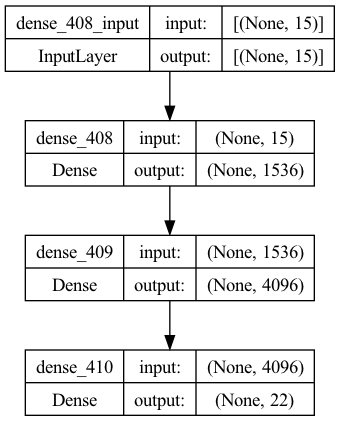

In [1577]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

In [1578]:
model.summary()

Model: "sequential_68"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_408 (Dense)           (None, 1536)              24576     
                                                                 
 dense_409 (Dense)           (None, 4096)              6295552   
                                                                 
 dense_410 (Dense)           (None, 22)                90134     
                                                                 
Total params: 6,410,262
Trainable params: 6,410,262
Non-trainable params: 0
_________________________________________________________________


In [1579]:
model.evaluate(X_test, y_test)

11/11 [==============================] - 0s 31ms/step - loss: 0.0165 - accuracy: 1.0000


[0.01653224416077137, 1.0]

In [1580]:
from sklearn.metrics import accuracy_score

preds = model.predict(X_test)
accuracy_score(tf.one_hot(tf.argmax(preds, axis=1), preds.shape[1]), y_test)

11/11 [==============================] - 0s 7ms/step


1.0